In [4]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/MyDrive/dataset1.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [5]:

# Preprocess the data
label_encoder = LabelEncoder()
df['status'] = label_encoder.fit_transform(df['status'])

# Separate features and labels
X = df.drop(['url', 'status'], axis=1)
y = df['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (optional but often beneficial for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy:.2%}')

# Evaluate other metrics (precision, recall, f1-score, etc.)
print(classification_report(y_test, y_pred_binary))


Epoch 1/10
258/258 [==============================] - 1s 3ms/step - loss: 0.3297 - accuracy: 0.8683 - val_loss: 0.1734 - val_accuracy: 0.9344
Epoch 2/10
258/258 [==============================] - 1s 2ms/step - loss: 0.1518 - accuracy: 0.9443 - val_loss: 0.1491 - val_accuracy: 0.9475
Epoch 3/10
258/258 [==============================] - 1s 3ms/step - loss: 0.1308 - accuracy: 0.9537 - val_loss: 0.1410 - val_accuracy: 0.9508
Epoch 4/10
258/258 [==============================] - 1s 3ms/step - loss: 0.1181 - accuracy: 0.9571 - val_loss: 0.1399 - val_accuracy: 0.9530
Epoch 5/10
258/258 [==============================] - 1s 3ms/step - loss: 0.1095 - accuracy: 0.9605 - val_loss: 0.1352 - val_accuracy: 0.9541
Epoch 6/10
258/258 [==============================] - 1s 4ms/step - loss: 0.1009 - accuracy: 0.9643 - val_loss: 0.1350 - val_accuracy: 0.9552
Epoch 7/10
258/258 [==============================] - 1s 4ms/step - loss: 0.0939 - accuracy: 0.9657 - val_loss: 0.1335 - val_accuracy: 0.9541
Epoch 

In [6]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Dense

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/MyDrive/dataset1.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

# Convert labels to binary (0 and 1)
label_encoder = LabelEncoder()
df['status'] = label_encoder.fit_transform(df['status'])

# Separate features and labels
X = df.drop(['url', 'status'], axis=1)
y = df['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (optional but often beneficial for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy:.2%}')

# Evaluate other metrics (precision, recall, f1-score, etc.)
print(classification_report(y_test, y_pred_binary))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/10
258/258 [==============================] - 1s 3ms/step - loss: 0.2939 - accuracy: 0.8929 - val_loss: 0.1703 - val_accuracy: 0.9333
Epoch 2/10
258/258 [==============================] - 1s 2ms/step - loss: 0.1510 - accuracy: 0.9447 - val_loss: 0.1559 - val_accuracy: 0.9519
Epoch 3/10
258/258 [==============================] - 1s 2ms/step - loss: 0.1298 - accuracy: 0.9518 - val_loss: 0.1441 - val_accuracy: 0.9541
Epoch 4/10
258/258 [==============================] - 1s 2ms/step - loss: 0.1167 - accuracy: 0.9571 - val_loss: 0.1388 - val_accuracy: 0.9519
Epoch 5/10
258/258 [==============================] - 1s 2ms/step - loss: 0.1073 - accuracy: 0.9615 - val_loss: 0.1383 - val_accuracy: 0.9563
Epoch 6/10
258/258 [==============================] - 1s 3ms/step - loss: 0.0998 - accuracy: 0.9638 - val_loss: 0.1434 - val_accuracy: 0.9541
Epoch 7/10
258/258 

72/72 [==============================] - 0s 3ms/step


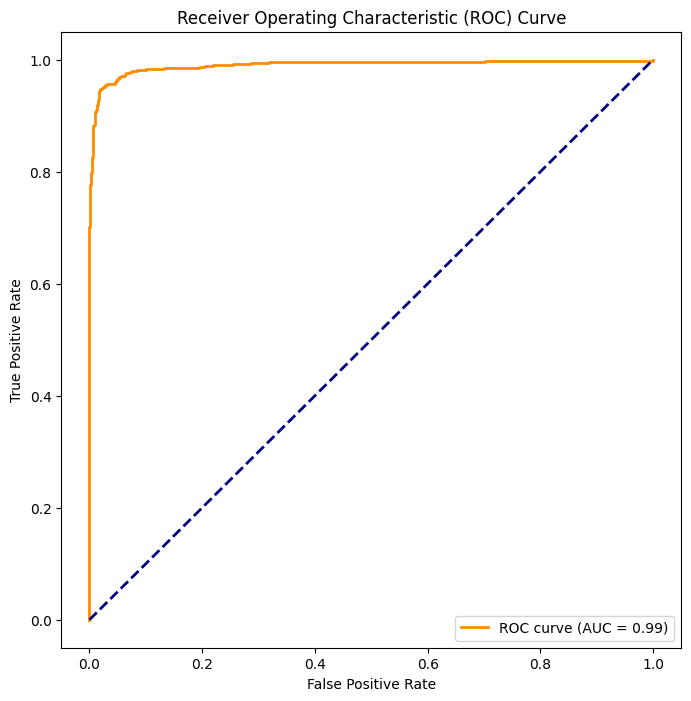

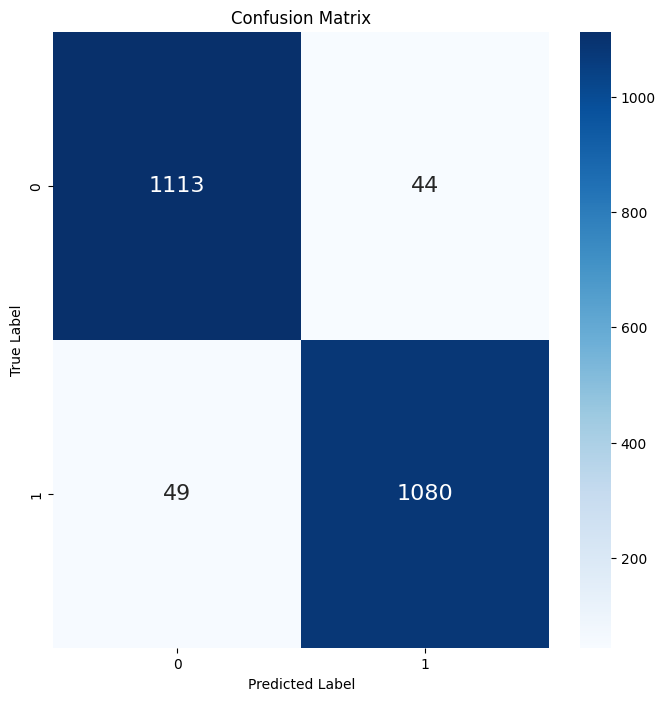

In [7]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score

# ... (previous code remains the same)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [8]:
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 4.4 MB/s eta 0:00:00


In [9]:
import shap

# Define a function to get predictions from the model
def predict_function(X):
    return model.predict(X).flatten()

# Get a background sample to explain predictions
background = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]

# Create a SHAP explainer using KernelExplainer
explainer = shap.KernelExplainer(predict_function, background)

# Explain the predictions on the entire test set
shap_values = explainer.shap_values(X_test, nsamples=500)

# Calculate mean SHAP values for the first 87 features
mean_shap_values = np.mean(np.abs(shap_values[:, :87]), axis=0)
mean_shap_df = pd.DataFrame({'Feature': X.columns[:87], 'Mean SHAP Value': mean_shap_values})
mean_shap_df = mean_shap_df.sort_values(by='Mean SHAP Value', ascending=False)

# Display mean SHAP values
print("Mean SHAP Values for Each Feature (First 87 Features):")
print(mean_shap_df)


4/4 [==============================] - 0s 6ms/step


  0%|          | 0/2286 [00:00<?, ?it/s]

1563/1563 [==============================] - 3s 2ms/step
Mean SHAP Values for Each Feature (First 87 Features):
                 Feature  Mean SHAP Value
86             page_rank         0.101111
85          google_index         0.087295
20                nb_www         0.070775
50           phish_hints         0.041064
56         nb_hyperlinks         0.037349
..                   ...              ...
8                  nb_or         0.000000
63       ratio_intErrors         0.000000
61  ratio_intRedirection         0.000000
59  ratio_nullHyperlinks         0.000000
68          submit_email         0.000000

[87 rows x 2 columns]


In [24]:
csv_file_path = '/content/drive/MyDrive/mean_shap_valuesann.csv'  # Change the path as needed
mean_shap_df.to_csv(csv_file_path, index=False)
print(f'Mean SHAP values exported to: {csv_file_path}')

Mean SHAP values exported to: /content/drive/MyDrive/mean_shap_valuesann.csv


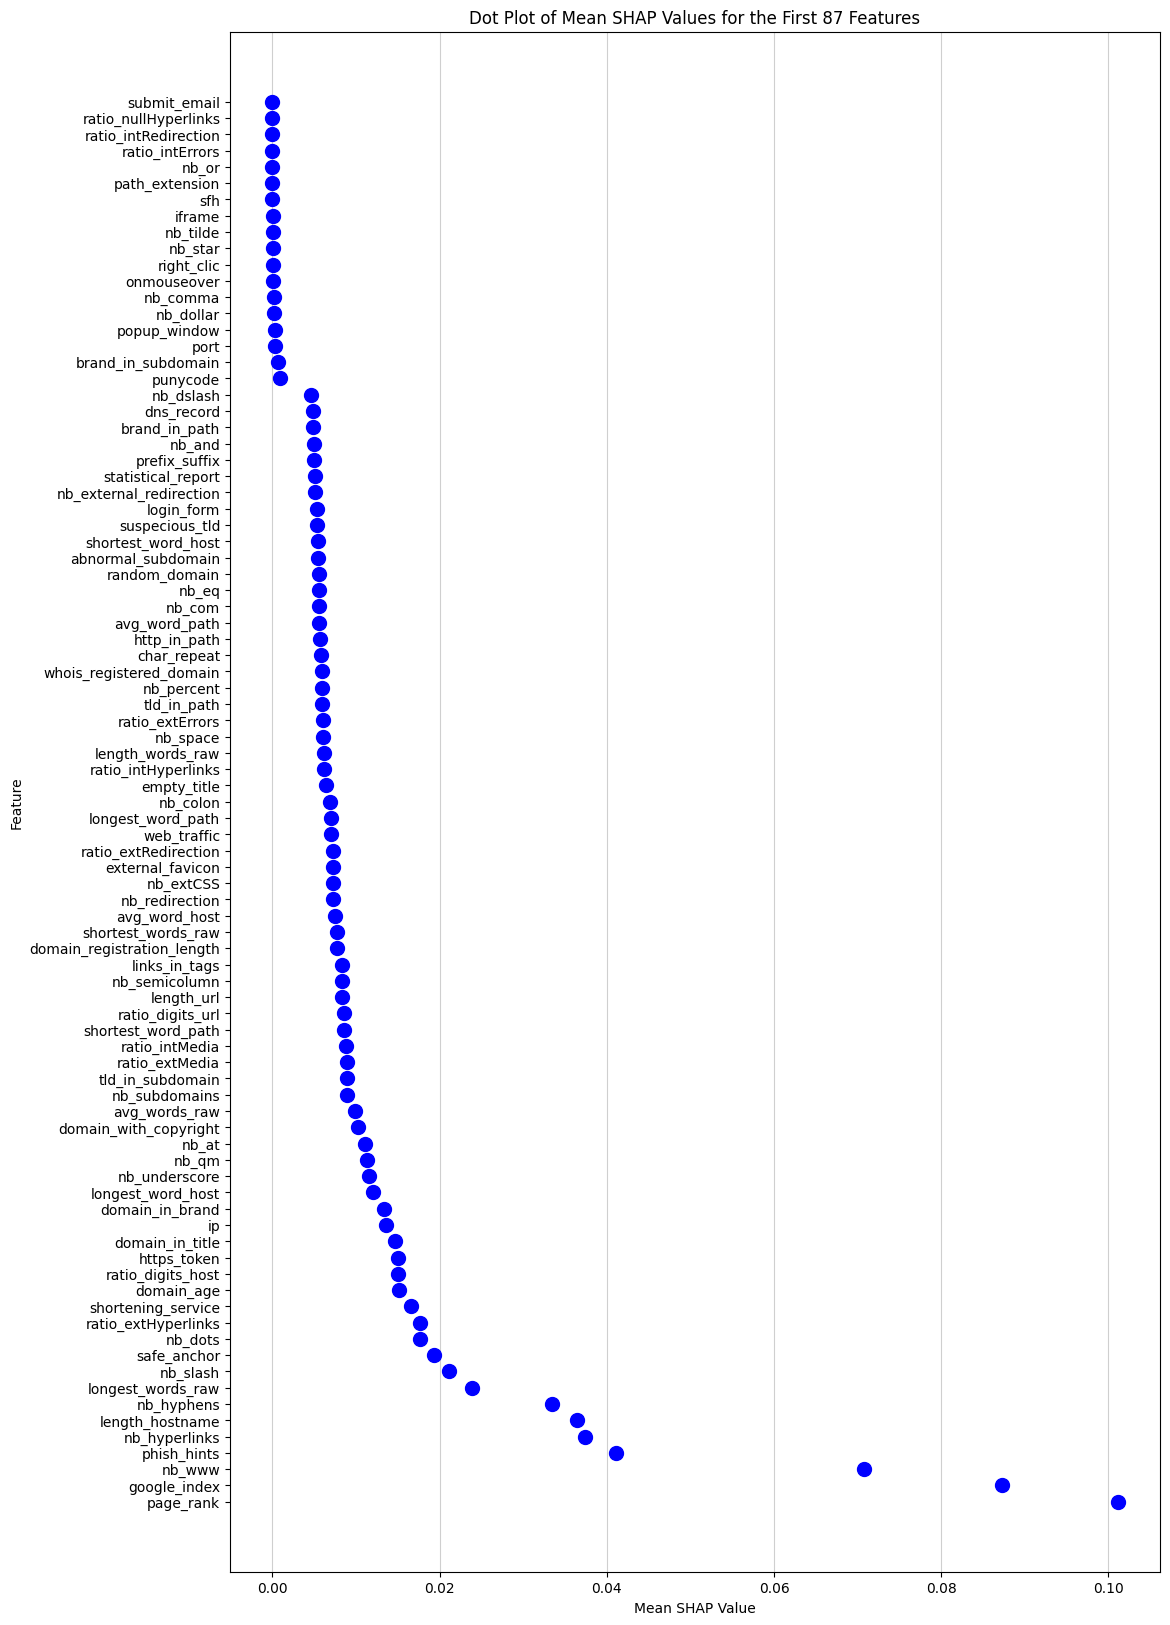

In [32]:
import matplotlib.pyplot as plt

# Assuming `sorted_shap_df` contains the sorted mean SHAP values DataFrame
plt.figure(figsize=(12, 20))
plt.plot(sorted_shap_df['Mean SHAP Value'], sorted_shap_df['Feature'], 'o', markersize=10, color='blue')
plt.xlabel('Mean SHAP Value')
plt.ylabel('Feature')
plt.title('Dot Plot of Mean SHAP Values for the First 87 Features')
plt.grid(axis='x', linestyle='-', alpha=0.6)
plt.show()


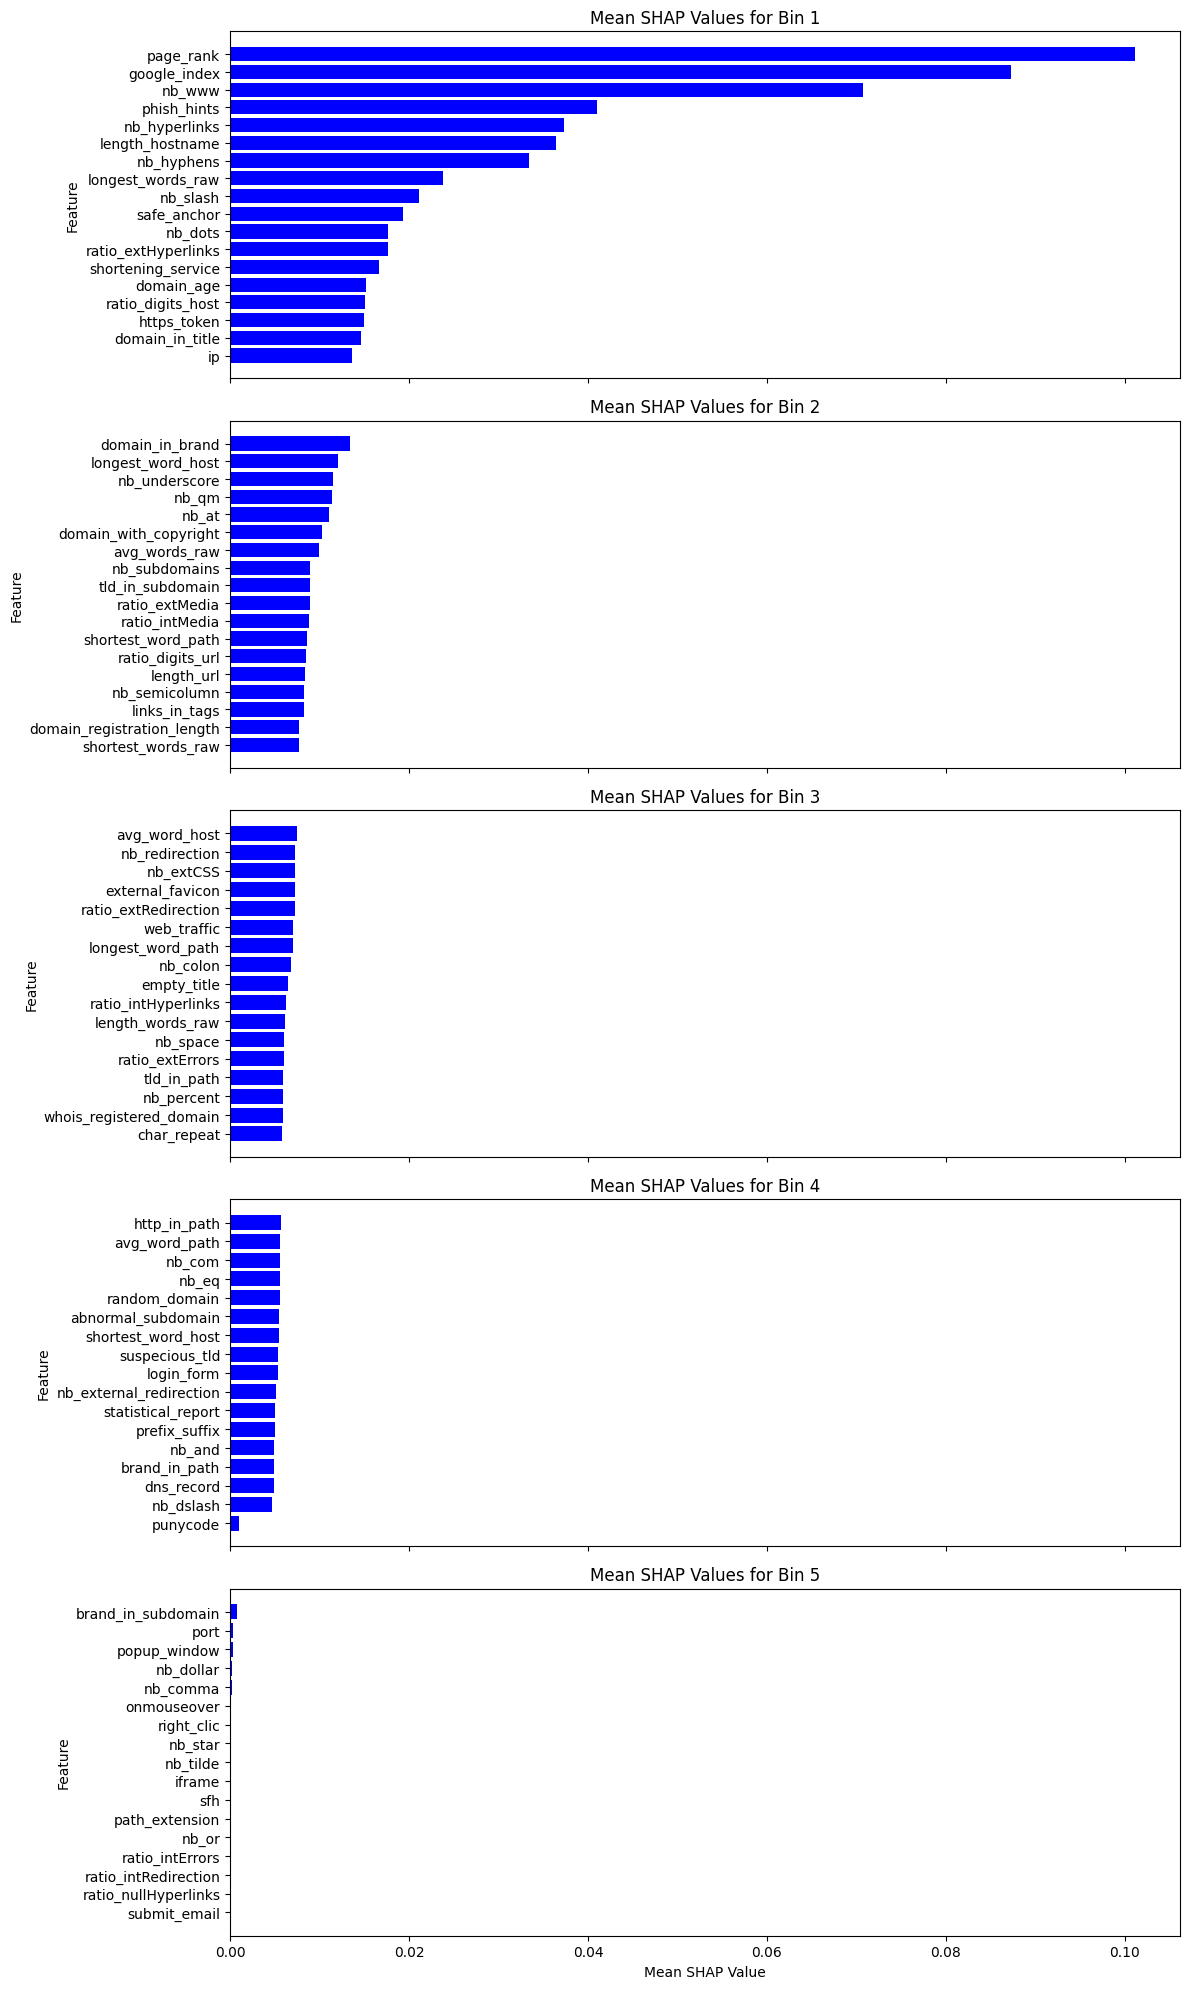

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `sorted_shap_df` contains the sorted mean SHAP values DataFrame
num_bins = 5  # Adjust the number of bins as needed

# Divide the features into bins
bins = np.array_split(sorted_shap_df['Feature'], num_bins)

# Create subplots
fig, axes = plt.subplots(num_bins, 1, figsize=(12, 4 * num_bins), sharex=True)

# Plot each bin as a separate subplot
for i, bin_features in enumerate(bins):
    bin_values = sorted_shap_df.loc[sorted_shap_df['Feature'].isin(bin_features), 'Mean SHAP Value']

    # Reverse the order of values
    bin_values = bin_values[::-1]

    # Increase the width of each bar
    bar_width = 0.8

    axes[i].barh(np.arange(len(bin_features)), bin_values, color='blue', height=bar_width)
    axes[i].set_yticks(np.arange(len(bin_features)))
    axes[i].set_yticklabels(bin_features[::-1])  # Reverse the order of features
    axes[i].set_ylabel('Feature')
    axes[i].set_title(f'Mean SHAP Values for Bin {i + 1}')

# Adjust layout
plt.xlabel('Mean SHAP Value')
plt.tight_layout()
plt.show()


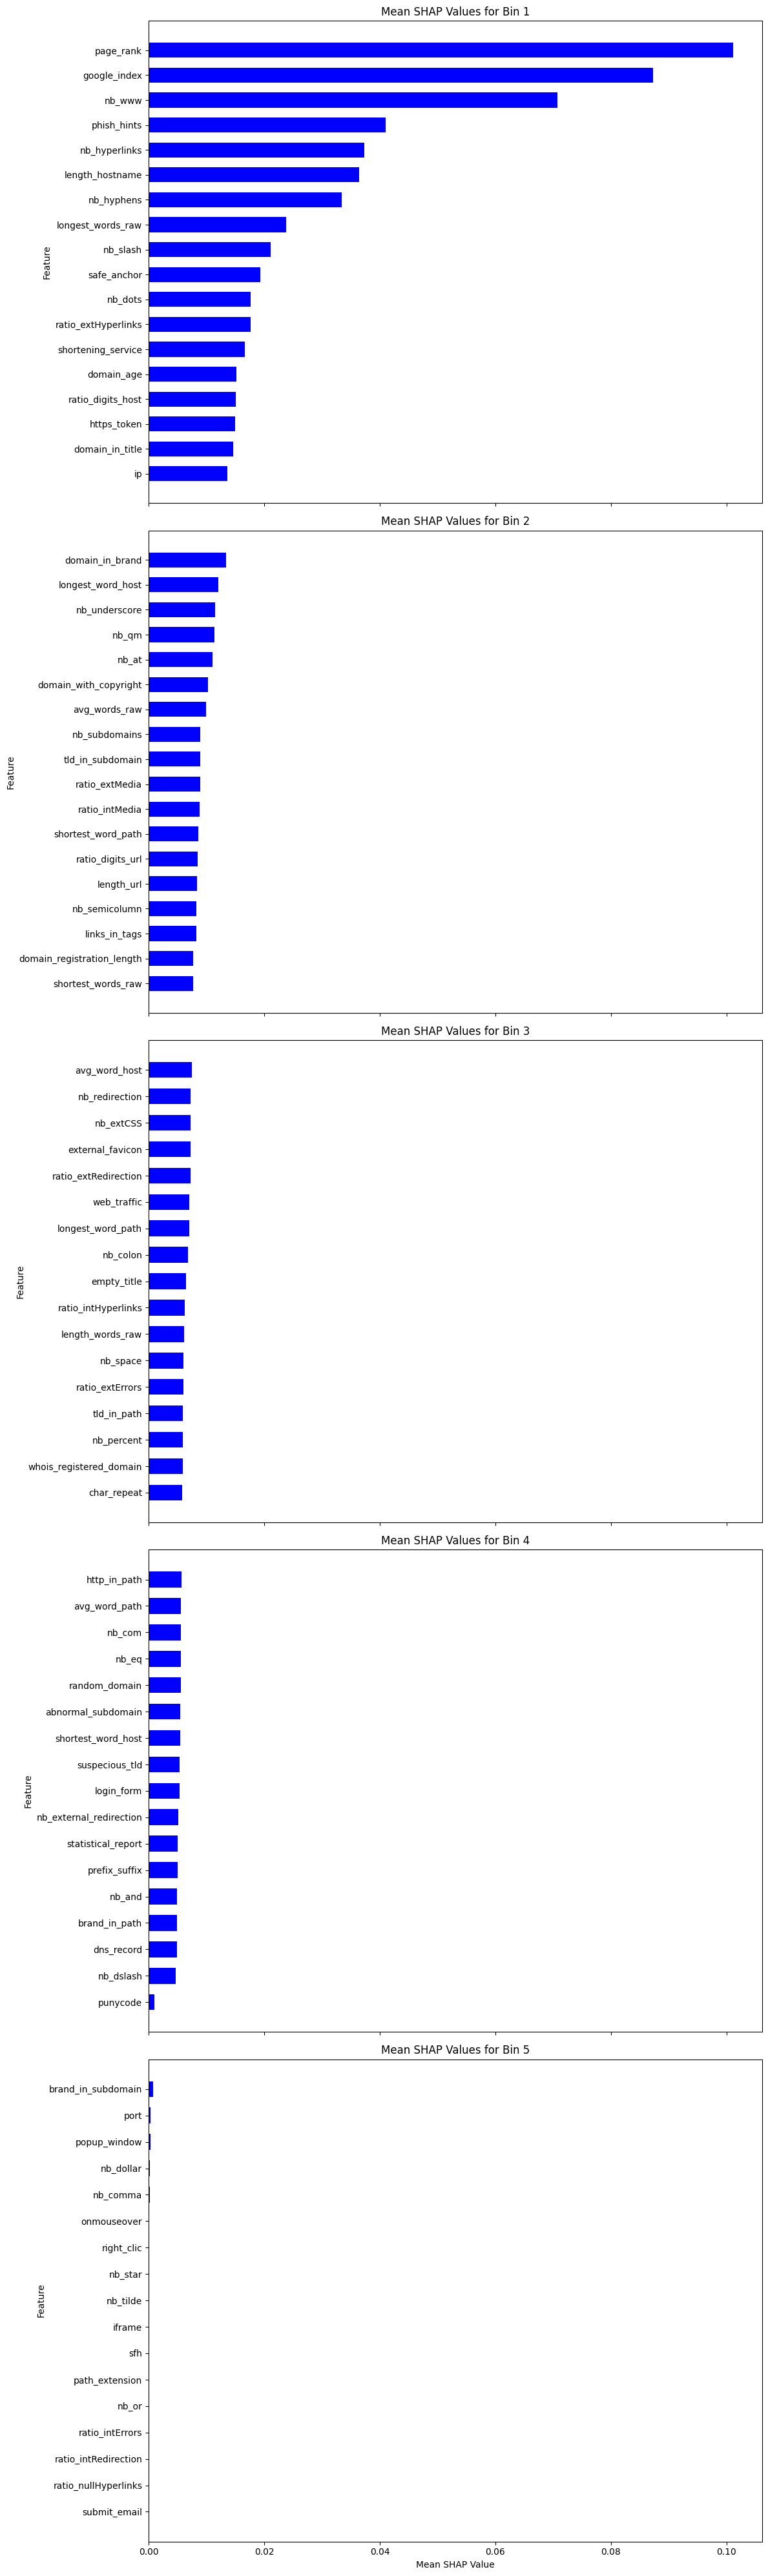

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `sorted_shap_df` contains the sorted mean SHAP values DataFrame
num_bins = 5  # Adjust the number of bins as needed

# Divide the features into bins
bins = np.array_split(sorted_shap_df['Feature'], num_bins)

# Create subplots
fig, axes = plt.subplots(num_bins, 1, figsize=(12, 8 * num_bins), sharex=True)

# Increase the width of each bar and the distance between bars
bar_width = 1.5  # Adjust the width as needed
bar_padding = 1  # Adjust the padding between bars as needed

# Plot each bin as a separate subplot
for i, bin_features in enumerate(bins):
    bin_values = sorted_shap_df.loc[sorted_shap_df['Feature'].isin(bin_features), 'Mean SHAP Value']

    # Reverse the order of values
    bin_values = bin_values[::-1]

    # Plot bars with increased width and padding
    axes[i].barh(np.arange(len(bin_features)) * (bar_width + bar_padding), bin_values, color='blue', height=bar_width)
    axes[i].set_yticks(np.arange(len(bin_features)) * (bar_width + bar_padding))
    axes[i].set_yticklabels(bin_features[::-1])  # Reverse the order of features
    axes[i].set_ylabel('Feature')
    axes[i].set_title(f'Mean SHAP Values for Bin {i + 1}')

# Adjust layout
plt.xlabel('Mean SHAP Value')
plt.tight_layout()
plt.show()
